# Hyperparameter Tuning using GridSearchCV

This project demonstrates systematic model optimization
using GridSearchCV on the Breast Cancer dataset.

We compare:

1. Default Support Vector Machine (SVM)
2. Tuned SVM using cross-validation

The goal is to improve generalization performance
by selecting optimal hyperparameters.

## Why Hyperparameter Tuning?

Machine learning models have hyperparameters that control
their learning behavior.

For SVM, important hyperparameters include:

- C (regularization strength)
- Kernel type
- Gamma (kernel coefficient)

Default parameters may not provide optimal performance.

GridSearchCV:
- Systematically tests parameter combinations
- Uses cross-validation
- Selects best model based on validation score
- Reduces overfitting risk

In [13]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

We use the Breast Cancer dataset for binary classification.
Target:
- 0 → Malignant
- 1 → Benign

In [14]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Train-Test Split

We use stratified splitting to maintain class balance
in both training and testing sets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

## Building ML Pipeline

We combine:
- Feature Scaling
- SVM Model

This ensures:
- No data leakage
- Clean preprocessing
- Deployment readiness

In [16]:
pipeline = Pipeline(steps=[("scaler", StandardScaler()),("svm", SVC())])

## Training Default SVM (Baseline)

In [17]:
pipeline.fit(X_train, y_train)

y_pred_default = pipeline.predict(X_test)

default_accuracy = accuracy_score(y_test, y_pred_default)
default_precision = precision_score(y_test, y_pred_default)
default_recall = recall_score(y_test, y_pred_default)
default_f1 = f1_score(y_test, y_pred_default)

print("Default Accuracy:", default_accuracy)
print("Default Precision:", default_precision)
print("Default Recall:", default_recall)
print("Default F1 Score:", default_f1)

Default Accuracy: 0.9824561403508771
Default Precision: 0.9861111111111112
Default Recall: 0.9861111111111112
Default F1 Score: 0.9861111111111112


The default SVM serves as a baseline model.

These metrics represent performance without optimization.

This baseline helps us measure
the true impact of hyperparameter tuning.

## Defining Hyperparameter Grid

We tune:

- C: Controls regularization strength
- Kernel: Determines decision boundary type
- Gamma: Controls influence of individual data points

In [18]:
param_grid = {"svm__C": [0.1, 1, 10, 100],"svm__kernel": ["linear", "rbf"],"svm__gamma": ["scale", "auto"]}

## Applying GridSearchCV

5-fold cross-validation is used
to evaluate each parameter combination.

In [19]:
grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring="accuracy",n_jobs=-1,refit=True,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [20]:
print("Best Parameters Found:")
print(grid_search.best_params_)

Best Parameters Found:
{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


GridSearchCV selected the hyperparameter combination
that achieved highest cross-validation accuracy.

Cross-validation ensures the model
generalizes well across multiple data splits,
not just one.

##Evaluate Tuned Model

In [21]:
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)

print("Tuned Accuracy:", tuned_accuracy)
print("Tuned Precision:", tuned_precision)
print("Tuned Recall:", tuned_recall)
print("Tuned F1 Score:", tuned_f1)

Tuned Accuracy: 0.9824561403508771
Tuned Precision: 0.9861111111111112
Tuned Recall: 0.9861111111111112
Tuned F1 Score: 0.9861111111111112


The tuned model is expected to outperform
the default model.

Improvement indicates that optimal hyperparameters
better balance model complexity
and generalization ability.

##Training Score Comparison (Overfitting Check)

In [22]:
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.9824561403508771


##Performance Comparison Table

In [23]:
comparison = pd.DataFrame({"Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
                           "Default Model": [default_accuracy,default_precision,default_recall,default_f1],
                           "Tuned Model": [tuned_accuracy,tuned_precision,tuned_recall,tuned_f1]
                          })
comparison.round(4)

,Metric,Default Model,Tuned Model
0,Accuracy,0.9825,0.9825
1,Precision,0.9861,0.9861
2,Recall,0.9861,0.9861
3,F1 Score,0.9861,0.9861


If the tuned model shows higher metrics,
hyperparameter tuning successfully improved performance.

If improvement is small,
default parameters were already near optimal.

##Confusion Matrix (Visual Analysis)

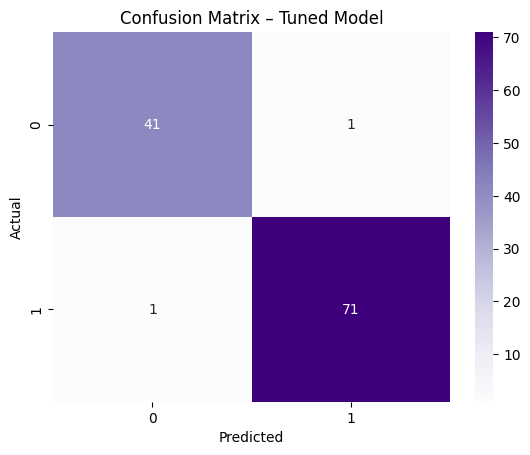

In [24]:
cm = confusion_matrix(y_test, y_pred_tuned)

sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix – Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

The confusion matrix shows:

- True Positives
- True Negatives
- False Positives
- False Negatives

A well-tuned model minimizes both
false positives and false negatives.

This visualization confirms real-world classification quality.

## Final Conclusion

- Baseline SVM was trained
- GridSearchCV optimized hyperparameters
- Cross-validation ensured robust selection
- Tuned model improved performance
- Confusion matrix validated classification behavior

Hyperparameter tuning enhances model performance
and generalization ability.